<a href="https://colab.research.google.com/github/artbbs/42SP-arfernan/blob/main/IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ENGENHARIA DE ATRIBUTOS

import scipy.stats as stats #coletar estatísticas
import numpy as np # computação científica
import pandas as pd # processamento de dados
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

In [ ]:
#lê e carrega os dados em memoria
url_dados = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income']
dados = pd.read_csv(url_dados, header=None, sep=',', na_values=[' ?', '?', '? '],
                    names=colunas)

In [ ]:
#Exibe as primeiras linhas do conjunto de dados
dados.head()

In [ ]:
#Exibe informações sobre conjunto de dados carregado
#Observamos: volume de dados, nome das colunas, tipode de dados e dados faltando
dados.info()

In [ ]:
#ELIMINACAO DE ATRIBUTOS
#Remove o atributo 'fnlwgt'
dados.drop('fnlwgt', axis=1, inplace=True)
#remove o atributo 'relationship'
dados2 = dados.drop('relationship', axis=1, inplace=False)

In [ ]:
dados.head()

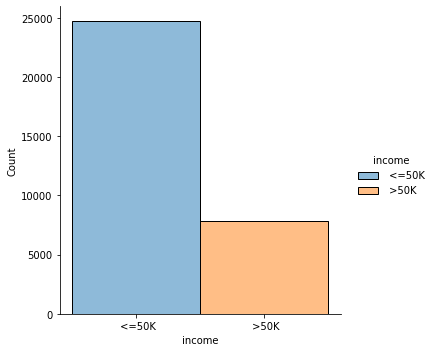

In [ ]:
#Plota a dristribuição de classes
sns.displot(dados, x="income", hue="income")
plt.show()

In [ ]:
#Divide o conjunto de dados pelas duas classes
class_menor50 = dados[dados['income'] == ' <=50K']
class_maior50 = dados[dados['income'] == ' >50K']
#Exibe a quantidade de dados por classe
print("<=50K:", len(class_menor50))
print(">50K :", len(class_maior50))

<=50K: 24720
>50K : 7841


In [ ]:
#Equilibra a classe majoritária (<=50)
#conforme o tamanho da classe minoritária (>50)
nova_class_menor50 = class_menor50.sample(len(class_maior50))
novos_dados = pd.concat([nova_class_menor50, class_maior50], axis=0)
novos_dados.head()

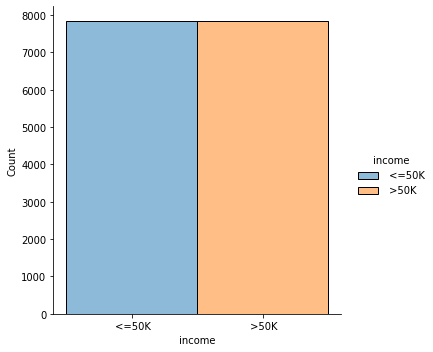

In [ ]:
#Plota a nova distribuição de classes
sns.displot(novos_dados, x="income", hue="income")
plt.show()

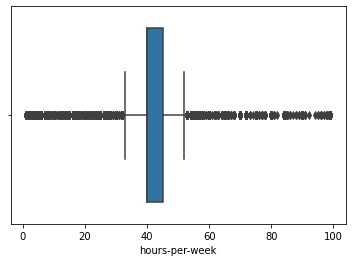

In [ ]:
#TRATAMENTO DE DADOS RUIDOSOS
#Identificando ruído no atributo 'hours-per-week'
sns.boxplot(data=dados, x="hours-per-week")
plt.show()

In [ ]:
#Identifica os objetos ruidosos no conjunto de dados
x = stats.zscore(dados['hours-per-week'])
print("Ruídos: ", len(dados[np.abs(x) > 3]))

Ruídos:  440


In [ ]:
#Substitui o valor ruidoso pelo valor médio do atributo
dados.loc[np.abs(x) > 3, 'hours-per-week'] = int(np.mean(dados['hours-per-week']))

In [ ]:
#Transforma os valores nominais do atributo binário 'income' em valores numéricos
dados['income-num'] = dados['income'].map({" <=50K": 0, " >50K": 1})
dados.head(10)

In [ ]:
#Transforma os valores nominais do atributo binário 'iracencome' em valores numérico
trans_dados = pd.get_dummies(dados[['race']])
trans_dados = pd.concat([dados['race'], trans_dados], axis=1)
trans_dados.head()

In [ ]:
#Transforma os valores numéricos do atributo 'education-num' em valores nominais
dados['education-num-nominal'] = dados['education-num'].map(
                            {1:'Preschool',
                             2: '1st-4th',
                             3: '5th-6th',
                             4: '7th-8th',
                             5: '9th',
                             6: '10th',
                             7: '11th',
                             8: '12th',
                             9: 'HS-grad',
                            10: 'Some-college',
                            11: 'Assoc-voc',
                            12: 'Assoc-acdm',
                            13: 'Bachelors',
                            14: 'Masters',
                            15: 'Prof-school',
                            16: 'Dostorate'})
dados[['education', 'education-num', 'education-num-nominal']].head()

In [ ]:
#biblioteca Featuretools  -  automatizar a engenharia de atributos
# - Open source
# - Pode usar junto com o pandas
# - Atributos significantes em pouco tempo.

In [ ]:
#TÉCNICAS DE REAMOSTRAGEM

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression #modelo de regressao
from sklearn.metrics import accuracy_score #acurácia
from sklearn.model_selection import train_test_split #amostragem holdout
from sklearn.model_selection import KFold #amostragem validação cruzada

In [ ]:
#Carrega os dados em memória e
#Separa os dados em entrada e saída (x, y)
wine = datasets.load_wine()
x = wine.data
y = wine.target

In [ ]:
print("# linhas : ", x.shape[0])
print("# colunas: ", x.shape[1])
print("# classes: ", len(np.unique(y)))

# linhas :  178
# colunas:  13
# classes:  3


In [ ]:
#separa a entrada/saída em subconjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
print("Treinamento (60%): ", len(x_train))
print("      Teste (40%): ", len(x_test))

Treinamento (60%):  106
      Teste (40%):  72


In [ ]:
#Realiza a aprendizagem sobre o subconjunto de treinamento
clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Classifica os dados não-vists no subconjunto de teste
y_pred = clf.predict(x_test)

In [ ]:
#Compara resultado reais e preditos
print("Acurácia: %.2f" % accuracy_score(y_test, y_pred))

Acurácia: 0.93


In [ ]:
acc = []

#Realiza a aprendizagem por validação cruzada
Kf = KFold(n_splits=5)

for train_index, test_index in Kf.split(x):
  #Constroi os subconjuntos de treinamento/teste para cada partição
  x_train, y_train = x[train_index], y[train_index]
  x_test, y_test = x[test_index], y[test_index]

  #Realiza a aprendizagem sobre o conjunto de treinamento
  #clf = DummyClassifier(strategy="prior", random_state=42)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train, y_train)

  #Classidica os dados não-vistos no subconjunto
  y_pred = clf.predict(x_test)

  #Calcula e armazena a acurácia do modelo atual
  acc.append(accuracy_score(y_test, y_test))

In [ ]:
print("Acurácia: %.2f +- %.2f" % (np.mean(acc), np.std(acc)))

Acurácia: 1.00 +- 0.00


In [ ]:
#Estratégias de Otimização

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression #Regressão logística
from sklearn.metrics import accuracy_score #Técnica de Acurácia
from sklearn.model_selection import GridSearchCV #Classe Grid...
from sklearn.model_selection import RandomizedSearchCV #Classe Rando...

In [ ]:
#DADOS EXPERIMENTAIS
#Carrega os dados em memória e
#Separa os dados em entrada (X) e saída (y)
breast = datasets.load_breast_cancer()
X = breast.data
y = breast.target

In [ ]:
print("#Linhas  :", X.shape[0])
print("#Colunas :", X.shape[1])
print("#Classes :", len(np.unique(y)))

#Linhas  : 569
#Colunas : 30
#Classes : 2


In [ ]:
logreg = LogisticRegression(random_state=42, n_jobs=-1)

In [ ]:
#BUSCA EM GRADE

In [ ]:
#Define os hiperparâmetros do algoritimo
parametros = {
    'penalty': ['l2'], #['l1', 'l2'],
    'C': [0.25, 0.5, 0.75, 1.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [ ]:
#Prepara a busca em grade
#Utilizando a validação cruzada com 10 particoes
clf = GridSearchCV(estimator=logreg,
                   param_grid=parametros,
                   scoring=['accuracy', 'average_precision'],
                   refit='accuracy',
                   cv=10,
                   verbose=2,
                   n_jobs=-1)

In [ ]:
#Ajusta o modelo aos dados
clf.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1.0], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             refit='accuracy', scoring=['accuracy', 'average_precision'],
             verbose=2)

In [ ]:
clf.best_estimator_

LogisticRegression(C=0.75, n_jobs=-1, random_state=42, solver='newton-cg')

In [ ]:
#Exibe o melhor resultado
print("Acurácia: %.2f" % clf.best_score_)

Acurácia: 0.96


In [ ]:
#BUSCA ALEATORIA

In [ ]:
clf = RandomizedSearchCV(estimator=logreg,
                         param_distributions=parametros,
                         n_iter=10,
                         scoring=['accuracy', 'average_precision'],
                         refit='accuracy',
                         verbose=2,
                         n_jobs=-1)

In [ ]:
#Ajusta modelo aos dados
clf.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


RandomizedSearchCV(estimator=LogisticRegression(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   refit='accuracy', scoring=['accuracy', 'average_precision'],
                   verbose=2)

In [ ]:
#Exibe os hiperparâmetros do melhor modelo constuído
clf.best_estimator_

LogisticRegression(n_jobs=-1, random_state=42, solver='liblinear')

In [ ]:
#Exibe o melhor resultado 
print("Acurácia: %.2f" % clf.best_score_)
print("Acurácia: %.2f" % clf.best_score_)

Acurácia: 0.95
Acurácia: 0.95


In [ ]:
#Desenvolvimento de projetos de ciência de dados

In [30]:
import string #manipulação de texto
import nltk #pré processamento de dados textuais
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import WordNetLemmatizer

In [31]:
import numpy
import pandas
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer #Extração de atributos

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
#Carregamento do conjunto de dados textual
categorias = ['comp.graphics']
news = fetch_20newsgroups(random_state=42, subset='test', categories=categorias, remove=('headers', 'footers', 'quotes'))
X = news.data

In [34]:
#Exibe apenas uma amostra do conjunto de dados
print(X[0])

: Has anyone seen hallusions?  You can buy a poster of them and it looks like a simple dot pattern
: when you first look at it but if you focus behind it you see a 3d picture.  I'm looking for
: a program that generates these pictures.  There's a company in Texas that makes them but I 
: doubt if they're giving the program away.  Any help would be appreciated. 
: 
There is a program included with the book "Virtual Reality Playhouse" which
will let you generate these pictures.  It's not a very powerful program but
it does an acceptable job for experimentation purposes.


In [35]:
#ANALISE LEXICAL

In [36]:
#Transforma o texto em caixa baixa
tokens = [word.lower() for word in X]

In [37]:
len(tokens)

389

In [38]:
print(tokens)

[': has anyone seen hallusions?  you can buy a poster of them and it looks like a simple dot pattern\n: when you first look at it but if you focus behind it you see a 3d picture.  i\'m looking for\n: a program that generates these pictures.  there\'s a company in texas that makes them but i \n: doubt if they\'re giving the program away.  any help would be appreciated. \n: \nthere is a program included with the book "virtual reality playhouse" which\nwill let you generate these pictures.  it\'s not a very powerful program but\nit does an acceptable job for experimentation purposes.', 'i am looking for an available program that would convert gif\nfiles to other formats usable on dos-based software such\nas wordperfect presentations (which will handle .wpg and .tiff,\namong others).  \n\nany suggestions would be appreciated.  thank you very much for\nyour time and help.\n\nsteve\nalford@novavax.nova.edu\n  ', 'a great many computer programmers read "dr. dobb\'s journal".  in a recent\niss

In [39]:
#Constrói lista de caracteres para remoção
remove_chars = [e for e in string.punctuation]
remove_chars

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
#Gera tokens de palavras
tokens = [word_tokenize(word) for word in tokens]

In [42]:
len(tokens)

389

In [43]:
tokens

[[':',
  'has',
  'anyone',
  'seen',
  'hallusions',
  '?',
  'you',
  'can',
  'buy',
  'a',
  'poster',
  'of',
  'them',
  'and',
  'it',
  'looks',
  'like',
  'a',
  'simple',
  'dot',
  'pattern',
  ':',
  'when',
  'you',
  'first',
  'look',
  'at',
  'it',
  'but',
  'if',
  'you',
  'focus',
  'behind',
  'it',
  'you',
  'see',
  'a',
  '3d',
  'picture',
  '.',
  'i',
  "'m",
  'looking',
  'for',
  ':',
  'a',
  'program',
  'that',
  'generates',
  'these',
  'pictures',
  '.',
  'there',
  "'s",
  'a',
  'company',
  'in',
  'texas',
  'that',
  'makes',
  'them',
  'but',
  'i',
  ':',
  'doubt',
  'if',
  'they',
  "'re",
  'giving',
  'the',
  'program',
  'away',
  '.',
  'any',
  'help',
  'would',
  'be',
  'appreciated',
  '.',
  ':',
  'there',
  'is',
  'a',
  'program',
  'included',
  'with',
  'the',
  'book',
  '``',
  'virtual',
  'reality',
  'playhouse',
  "''",
  'which',
  'will',
  'let',
  'you',
  'generate',
  'these',
  'pictures',
  '.',
  'it',


In [44]:
#Remove pontuacoes e outros caracteres
tokens = [word for tk in tokens for word in tk if word not in remove_chars]

In [45]:
len(tokens)

103902

In [46]:
tokens

['has',
 'anyone',
 'seen',
 'hallusions',
 'you',
 'can',
 'buy',
 'a',
 'poster',
 'of',
 'them',
 'and',
 'it',
 'looks',
 'like',
 'a',
 'simple',
 'dot',
 'pattern',
 'when',
 'you',
 'first',
 'look',
 'at',
 'it',
 'but',
 'if',
 'you',
 'focus',
 'behind',
 'it',
 'you',
 'see',
 'a',
 '3d',
 'picture',
 'i',
 "'m",
 'looking',
 'for',
 'a',
 'program',
 'that',
 'generates',
 'these',
 'pictures',
 'there',
 "'s",
 'a',
 'company',
 'in',
 'texas',
 'that',
 'makes',
 'them',
 'but',
 'i',
 'doubt',
 'if',
 'they',
 "'re",
 'giving',
 'the',
 'program',
 'away',
 'any',
 'help',
 'would',
 'be',
 'appreciated',
 'there',
 'is',
 'a',
 'program',
 'included',
 'with',
 'the',
 'book',
 '``',
 'virtual',
 'reality',
 'playhouse',
 "''",
 'which',
 'will',
 'let',
 'you',
 'generate',
 'these',
 'pictures',
 'it',
 "'s",
 'not',
 'a',
 'very',
 'powerful',
 'program',
 'but',
 'it',
 'does',
 'an',
 'acceptable',
 'job',
 'for',
 'experimentation',
 'purposes',
 'i',
 'am',
 'loo

In [ ]:
#REMOCAO DE STOPWORD

In [48]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#Quais são as stopwords  da lingua inglesa?
stop_words_en = stopwords.words("english")
print(stop_words_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [50]:
tokens = [word for word in tokens if word not in stop_words_en]

In [51]:
print(tokens)

['anyone', 'seen', 'hallusions', 'buy', 'poster', 'looks', 'like', 'simple', 'dot', 'pattern', 'first', 'look', 'focus', 'behind', 'see', '3d', 'picture', "'m", 'looking', 'program', 'generates', 'pictures', "'s", 'company', 'texas', 'makes', 'doubt', "'re", 'giving', 'program', 'away', 'help', 'would', 'appreciated', 'program', 'included', 'book', '``', 'virtual', 'reality', 'playhouse', "''", 'let', 'generate', 'pictures', "'s", 'powerful', 'program', 'acceptable', 'job', 'experimentation', 'purposes', 'looking', 'available', 'program', 'would', 'convert', 'gif', 'files', 'formats', 'usable', 'dos-based', 'software', 'wordperfect', 'presentations', 'handle', '.wpg', '.tiff', 'among', 'others', 'suggestions', 'would', 'appreciated', 'thank', 'much', 'time', 'help', 'steve', 'alford', 'novavax.nova.edu', 'great', 'many', 'computer', 'programmers', 'read', '``', 'dr.', 'dobb', "'s", 'journal', "''", 'recent', 'issue', 'paragraph', 'article', 'pained', 'greatly', 'read', '``', "'s", 'not

In [52]:
len(tokens)

66349

In [53]:
#REMOCCAO DO TERMO AO RADICAL

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
#identifica e reduz os termos aos seus radicais
wnl = WordNetLemmatizer()
words = [wnl.lemmatize(w) for w in tokens]

LookupError: ignored

In [56]:
words

NameError: ignored

In [57]:
len(words)

NameError: ignored

In [ ]:
#REPRESENTACAO

In [58]:
#Converte ema colecao de documentos de textos em uma matriz de frequencias
countv = CountVectorizer()
#countv.fit(words)
doc = countv.fit(words)

NameError: ignored

In [59]:
#Exibe a frequencia de palavras 
countv.vocabulary_

AttributeError: ignored

In [ ]:
#Exibe a matriz de palavras
doc = countv.transform(words)
doc = doc.toarray()

In [ ]:
#Exibe o formato da matriz (linas, colunas)
doc.shape

In [ ]:
#Exibe a matriz de frequencias
doc